## Import libraries

In [1]:
import pandas as pd
import numpy as np

#Importing data visulaisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.describe().T   #Statistical details of the dataframe

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [4]:
#A function is defined which classifies the average glucose level of the people into various categories like high, low and normal.
#This function is applied on the avg_glucose_level column and another column is added to the dataframe df based on the results obtained on applying this function.

def glucose_level(amount):
    if amount<60:
        return 'Dangerously low'
    elif 60<=amount<90:
        return 'Low'
    elif 90<=amount<110:
        return 'Normal'
    elif 110<=amount<140:
        return 'Slightly high'
    elif 140<=amount<240:
        return 'High'
    elif 240<=amount<300:
        return 'Extremely high'
    else:
        return 'Dangerously high, requires medical attention'
    
#This classification is done based on the data available on the internet.
    
df['Glucose_level_chart']=df['avg_glucose_level'].apply(glucose_level)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_level_chart
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,High
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,High
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,High
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,High


## Exploratory Data Analysis(EDA)

stroke  Glucose_level_chart
0       Low                    2102
        Normal                 1191
        High                    684
        Slightly high           628
        Dangerously low         212
        Extremely high           44
1       High                     82
        Low                      80
        Normal                   44
        Slightly high            24
        Extremely high           11
        Dangerously low           8
Name: count, dtype: int64


Text(0.5, 0.98, 'Glucose level chart counts by stroke and gender')

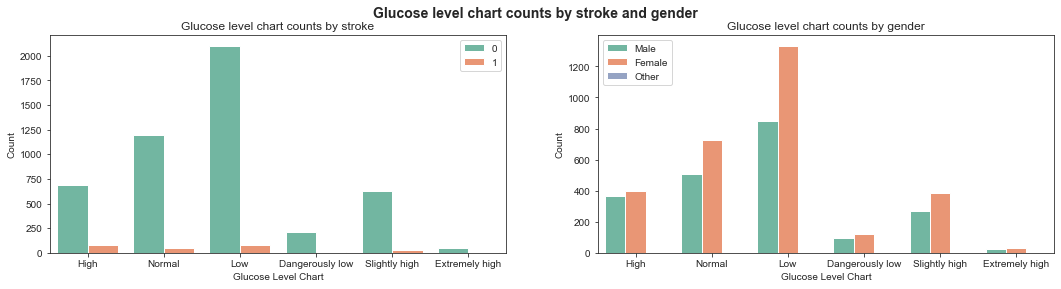

In [5]:
# Display the count of glucose level charts grouped by stroke
stroke_glucose_counts = df.groupby('stroke')['Glucose_level_chart'].value_counts()
print(stroke_glucose_counts)

# Set the plot style
sns.set_style('ticks')

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

# Create a countplot of glucose level chart counts by stroke
sns.countplot(ax=axes[0], x='Glucose_level_chart', hue='stroke', data=df, palette='Set2')
axes[0].set_title('Glucose level chart counts by stroke')

# Create a countplot of glucose level chart counts by gender
sns.countplot(ax=axes[1], x='Glucose_level_chart', hue='gender', data=df, palette='Set2')
axes[1].set_title('Glucose level chart counts by gender')

# Add axis labels and a legend
for ax in axes:
    ax.set_xlabel('Glucose Level Chart')
    ax.set_ylabel('Count')
    ax.legend(title=None)

# Add a suptitle to the figure
fig.suptitle('Glucose level chart counts by stroke and gender', fontsize=14, fontweight='bold')


Total number of people who suffered a stroke: 249


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

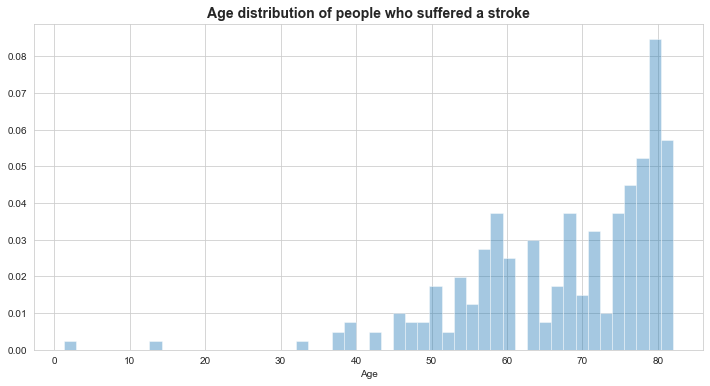

In [6]:
list_stroke=[]

for i in df['age'].index:
    if (df['stroke'][i]==1):
        list_stroke.append(df['age'][i])
print('Total number of people who suffered a stroke:', len(list_stroke))

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
plt.title('Age distribution of people who suffered a stroke',fontweight='bold',fontsize=14)
plt.xlabel('Age')
sns.distplot(list_stroke,bins=50)

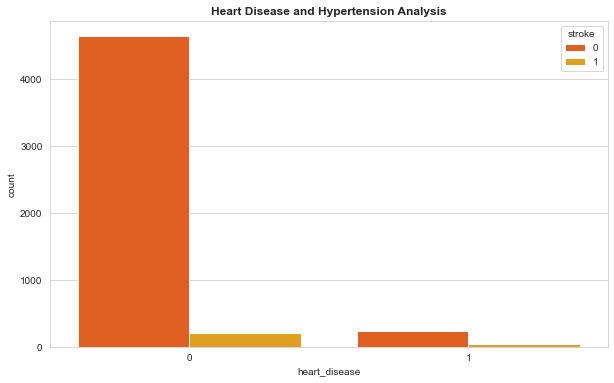

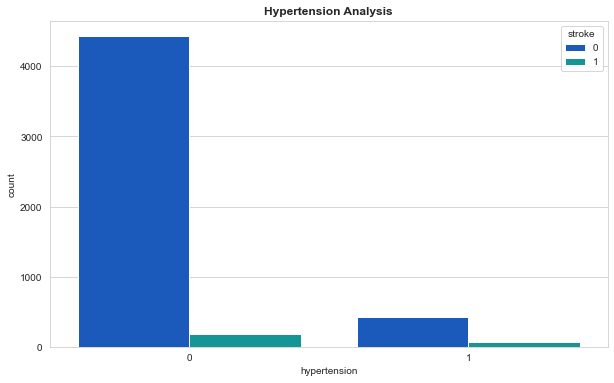

In [7]:
plt.figure(figsize=(10, 6))
plt.title('Heart Disease and Hypertension Analysis', fontweight='bold')
plt.xlabel('Heart Disease')
sns.countplot(x='heart_disease', data=df, hue='stroke', palette='autumn')
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Hypertension Analysis', fontweight='bold')
plt.xlabel('Hypertension')
sns.countplot(x='hypertension', data=df, hue='stroke', palette='winter')
plt.show()


Text(0.5, 0.98, 'Distribution of stroke patients by gender and age')

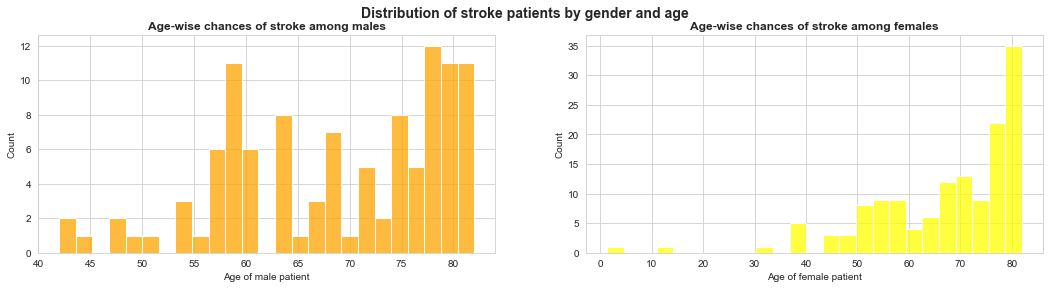

In [8]:
male_patients = df.loc[(df['stroke'] == 1) & (df['gender'] == 'Male'), 'age']
female_patients = df.loc[(df['stroke'] == 1) & (df['gender'] == 'Female'), 'age']

fig, axes = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(male_patients, ax=axes[0], color='orange', bins=25)
axes[0].set_title('Age-wise chances of stroke among males', fontweight='bold')
axes[0].set_xlabel('Age of male patient')

sns.histplot(female_patients, ax=axes[1], color='yellow', bins=25)
axes[1].set_title('Age-wise chances of stroke among females', fontweight='bold')
axes[1].set_xlabel('Age of female patient')

fig.suptitle('Distribution of stroke patients by gender and age', fontsize=14, fontweight='bold')


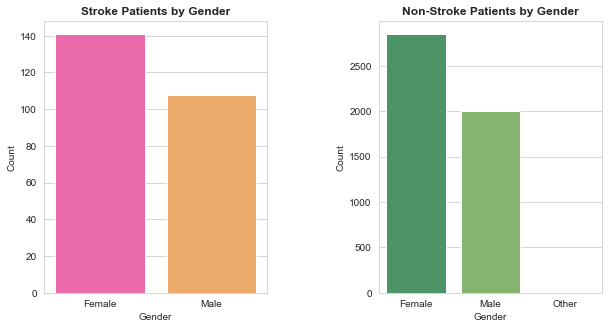

In [9]:
# Get data for stroke patients
df_stroke = df[df['stroke'] == 1]

# Group data by gender for stroke patients
df_stroke_gender = df_stroke.groupby('gender').size().reset_index(name='counts')

# Get data for non-stroke patients
df_non_stroke = df[df['stroke'] == 0]

# Group data by gender for non-stroke patients
df_non_stroke_gender = df_non_stroke.groupby('gender').size().reset_index(name='counts')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot stroke patients by gender
sns.barplot(x='gender', y='counts', data=df_stroke_gender, palette='spring', ax=ax1)
ax1.set_title('Stroke Patients by Gender', fontweight='bold')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')

# Plot non-stroke patients by gender
sns.barplot(x='gender', y='counts', data=df_non_stroke_gender, palette='summer', ax=ax2)
ax2.set_title('Non-Stroke Patients by Gender', fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()



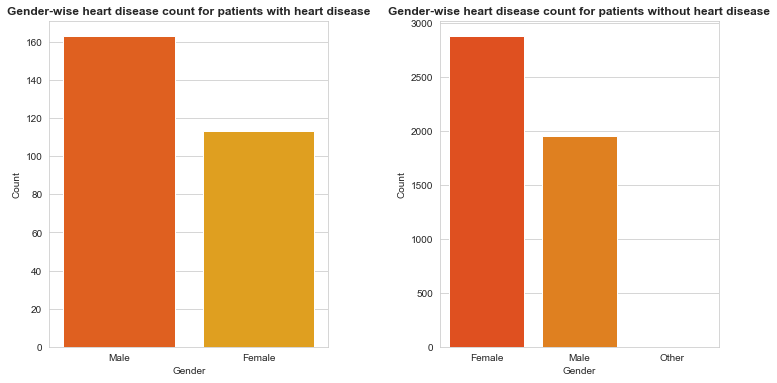

In [10]:
# Separate patients with and without heart diseases
patients_with_heart_disease = df[df['heart_disease'] == 1]
patients_without_heart_disease = df[df['heart_disease'] == 0]

# Create subplots for both plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot gender-wise heart disease count for patients with heart disease
sns.countplot(x='gender', data=patients_with_heart_disease, palette='autumn', ax=axes[0])
axes[0].set_title('Gender-wise heart disease count for patients with heart disease', fontweight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot gender-wise heart disease count for patients without heart disease
sns.countplot(x='gender', data=patients_without_heart_disease, palette='autumn', ax=axes[1])
axes[1].set_title('Gender-wise heart disease count for patients without heart disease', fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Show the plots
plt.show()

Text(0, 0.5, 'Count')

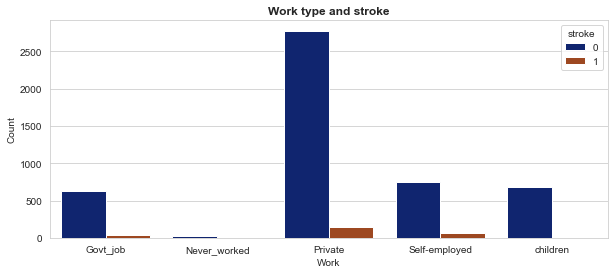

In [11]:
work_stroke_counts = df.groupby(['work_type', 'stroke']).size().reset_index(name='counts')

plt.figure(figsize=(10, 4))
sns.barplot(x='work_type', y='counts', hue='stroke', data=work_stroke_counts, palette='dark')
plt.title('Work type and stroke', fontweight='bold')
plt.xlabel('Work')
plt.ylabel('Count')


smoking_status   stroke
Unknown          0         1497
                 1           47
formerly smoked  0          815
                 1           70
never smoked     0         1802
                 1           90
smokes           0          747
                 1           42
Name: count, dtype: int64


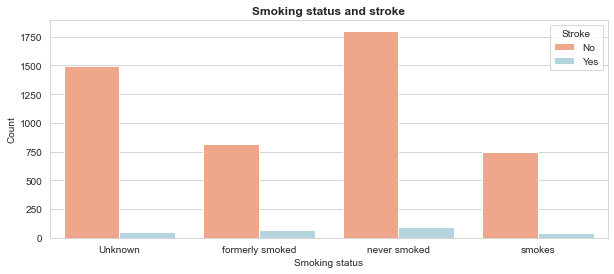

In [12]:
print(df.groupby('smoking_status').stroke.value_counts())
smoking_stroke_counts = df.groupby(['smoking_status', 'stroke']).size().reset_index(name='counts')

plt.figure(figsize=(10, 4))
sns.barplot(x='smoking_status', y='counts', hue='stroke', data=smoking_stroke_counts, palette=['#FFA07A', '#ADD8E6'])
plt.title('Smoking status and stroke', fontweight='bold')
plt.xlabel('Smoking status')
plt.ylabel('Count')

# Modify legend labels
leg = plt.legend(title='Stroke', loc='upper right')
leg.get_texts()[0].set_text('No')
leg.get_texts()[1].set_text('Yes')


<AxesSubplot:>

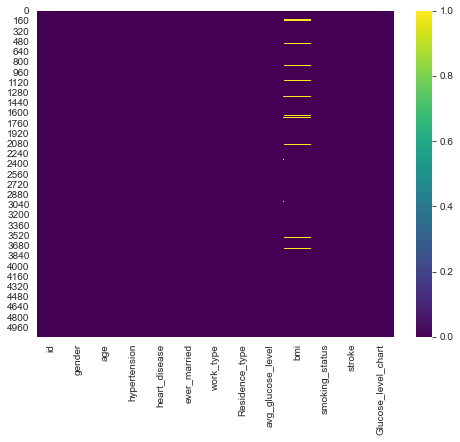

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cmap='viridis')

In [14]:
#Only the bmi column has missing data.
#Filling in the missing values for bmi.
   
 #1. Creating a function to classify bmi values into different groups.
 #2. Based on the classification we will create box plots.
 #3. Based on the averages obtained through box plots we will fill the average value in different classifications made in #1. 

def bmi_values(bmi_values):
    if bmi_values<20:
        return 'undernourished'
    elif 20<=bmi_values<30:
        return 'normal_weight_1'
    elif 30<=bmi_values<40:
        return 'overweight'
    elif 40<=bmi_values<50:
        return 'Obese I'
    elif 50<=bmi_values<70:
        return 'Obese II'
    elif 70<=bmi_values<100:
        return 'Obese III'
    else:
        pass
df['bmi_classification']=df['bmi'].apply(bmi_values)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_level_chart,bmi_classification
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,High,overweight
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,High,None
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Normal,overweight
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,High,overweight
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,High,normal_weight_1


bmi_classification  stroke
Obese I             0          317
                    1           18
Obese II            0           74
                    1            1
Obese III           0            4
normal_weight_1     0         2361
                    1          108
overweight          0         1427
                    1           79
undernourished      0          517
                    1            3
Name: count, dtype: int64


Text(0.5, 1.0, 'BMI classes')

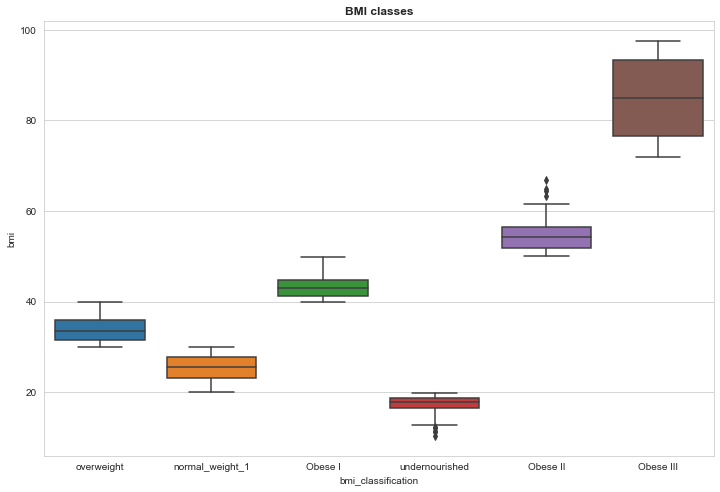

In [15]:
print(df.groupby('bmi_classification').stroke.value_counts())

plt.figure(figsize=(12,8))  #Box plots
sns.set_style('whitegrid')
sns.boxplot(x='bmi_classification',y='bmi',data=df)
plt.title('BMI classes',fontweight='bold',fontsize=12)

In [16]:
def bmi_fill(bmi_value):       #Filling in values based on the results obatined from the box plot.
    if pd.isnull(bmi_value):   
        if bmi_value<=20:
            return 17
        elif 20<bmi_value<=30:
            return 26
        elif 30<bmi_value<=40:
            return 33
        elif 40<bmi_value<=50:
            return 43
        elif 50<bmi_value<=70:
            return 55
        elif 70<bmi_value<=100:
            return 63
        else:
            return 105
    else:
        return bmi_value 
    
df['bmi']=df['bmi'].apply(bmi_fill)
df.head()  

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_level_chart,bmi_classification
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,High,overweight
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,105.0,never smoked,1,High,None
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Normal,overweight
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,High,overweight
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,High,normal_weight_1


In [17]:
df['bmi'].isnull().sum()

0

In [21]:
Gender =pd.get_dummies(df['gender'],drop_first=True)   #Getting dummies for categorical column -'gender' (that has strings)
df=pd.concat([df,Gender],axis=1)

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Glucose_level_chart,bmi_classification,Male,Other,Male,Other
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,High,overweight,True,False,True,False
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,105.0,never smoked,1,High,None,False,False,False,False
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Normal,overweight,True,False,True,False
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,High,overweight,False,False,False,False
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,High,normal_weight_1,False,False,False,False


In [23]:
#Now there are no missing values in the bmi column.

#Dropping the columns that are not required for training the model.
df.drop(['id','bmi_classification','work_type','ever_married','Residence_type','smoking_status','Glucose_level_chart','gender'],axis=1,inplace=True)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Other,Male,Other
0,67.0,0,1,228.69,36.6,1,True,False,True,False
1,61.0,0,0,202.21,105.0,1,False,False,False,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,False,False
4,79.0,1,0,174.12,24.0,1,False,False,False,False


In [24]:
X = df.drop(columns=["stroke"])
y = df["stroke"]

In [25]:
print('Shape of X:', X.shape)
X.head()

Shape of X: (5110, 9)


,age,hypertension,heart_disease,avg_glucose_level,bmi,Male,Other,Male,Other
0,67.0,0,1,228.69,36.6,True,False,True,False
1,61.0,0,0,202.21,105.0,False,False,False,False
2,80.0,0,1,105.92,32.5,True,False,True,False
3,49.0,0,0,171.23,34.4,False,False,False,False
4,79.0,1,0,174.12,24.0,False,False,False,False


In [26]:
print('Shape of y:', y.shape)
y.head()

Shape of y: (5110,)


0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

## Decision Tree 

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
from sklearn.tree import DecisionTreeClassifier

In [28]:
print('Shape of X after statifcation: ', X.shape)
print('Shape of y after stratification: ', y.shape)

Shape of X after statifcation:  (5110, 9)
Shape of y after stratification:  (5110,)


In [29]:
lm=DecisionTreeClassifier()

In [30]:
lm.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
lm_predictions=lm.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,lm_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1446
           1       0.17      0.16      0.16        87

    accuracy                           0.91      1533
   macro avg       0.56      0.56      0.56      1533
weighted avg       0.91      0.91      0.91      1533



In [34]:
print(confusion_matrix(y_test,lm_predictions))

[[1376   70]
 [  73   14]]


In [35]:
lm.score(X_test,y_test)

0.9067188519243313

## Random Forest

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc=RandomForestClassifier()

In [38]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [39]:
prediction_rfc= rfc.predict(X_test)

In [40]:
print('Confusion Matrix; ')
print(confusion_matrix(y_test,prediction_rfc))
print('\n')
print('Classification Report: ')
print(classification_report(y_test,prediction_rfc))

Confusion Matrix; 
[[1446    0]
 [  81    6]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1446
           1       1.00      0.07      0.13        87

    accuracy                           0.95      1533
   macro avg       0.97      0.53      0.55      1533
weighted avg       0.95      0.95      0.92      1533



In [41]:
rfc.score(X_test,y_test)

0.9471624266144814

In [42]:
#Error in case of Random forest model

mean_sq_error_rfc=mean_squared_error(y_test,prediction_rfc)
print('Mean squared error: ',mean_sq_error_rfc)
print('Root mean squared error ',mean_sq_error_rfc**0.5)

Mean squared error:  0.05283757338551859
Root mean squared error  0.22986424990745863
